## Import Necessary Dependencies

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns; sns.set()
import json
import pymongo

from collections import Counter
from pandas import DataFrame

from sklearn.feature_selection import SelectKBest,chi2, f_classif

## Exploring the Dataset

In [2]:
dataset = pd.read_csv('../Resources/healthcare-dataset-stroke-data.csv')
dataset.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [3]:
# Drop the 'id' column because it is not needed for correlation analysis
dataset.drop('id', axis=1, inplace=True)

## Feature Descriptions from Kaggle

- id: unique identifier
- gender: "Male", "Female" or "Other"
- age: age of the patient
- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
- stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


- Categorical Features: 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'
- Numerical Features: 'hypertension', 'heart_disease', 'stroke', 'age', 'bmi', 'avg_glucose_level'

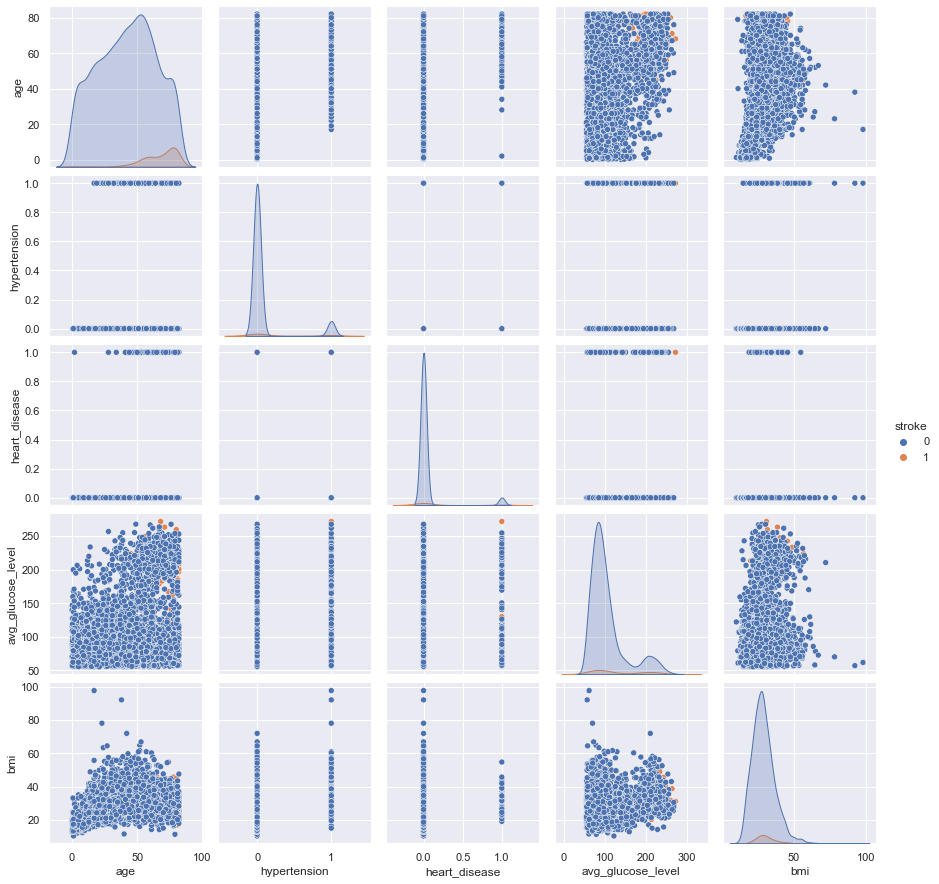

In [5]:
sns.pairplot(dataset, hue="stroke", kind="scatter")

## Categorical Features

In [6]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [7]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


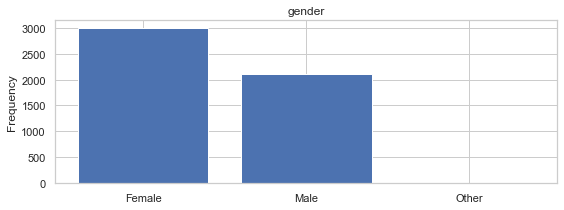

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


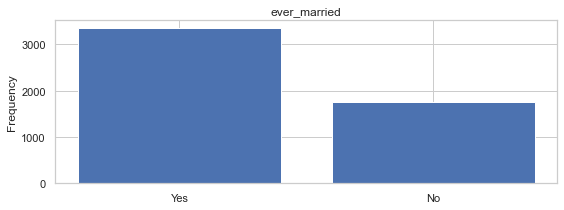

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


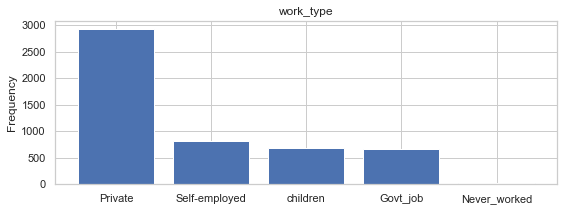

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


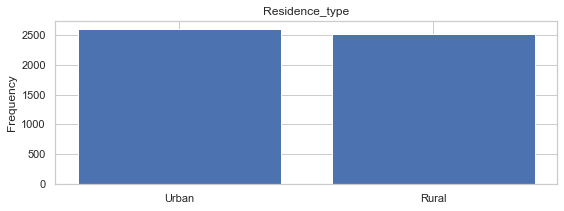

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


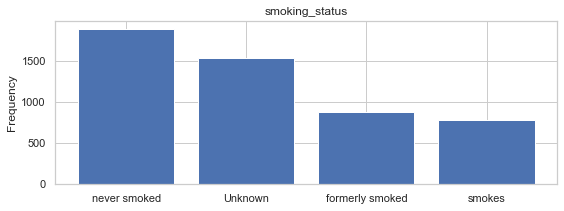

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [8]:
sns.set_style('whitegrid')
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for c in categorical_variables:
    bar_plot(c)

## Numerical Features (int64 type)

In [9]:
def plot_hist(variable):
    
    #get feature
    var = dataset[variable]
    
    #count number of variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.hist(var, bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
    print("{}:\n{}".format(variable, varValue))

In [10]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Categorical variables:")
print(numerical_int64_list)

Categorical variables:
['hypertension', 'heart_disease', 'stroke']


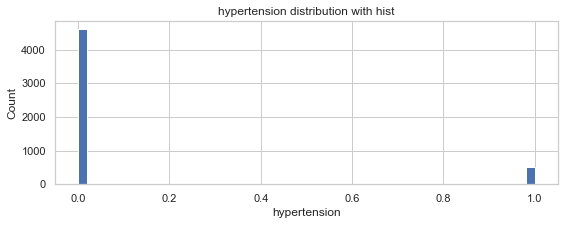

hypertension:
0    4612
1     498
Name: hypertension, dtype: int64


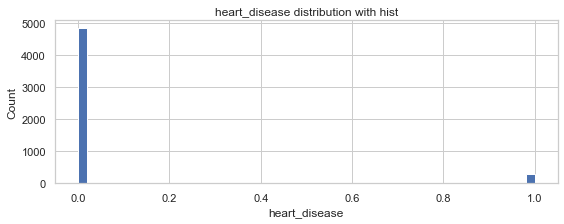

heart_disease:
0    4834
1     276
Name: heart_disease, dtype: int64


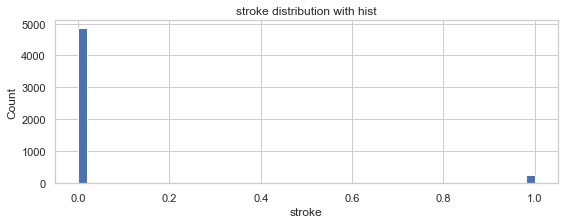

stroke:
0    4861
1     249
Name: stroke, dtype: int64


In [11]:
numerical_variables = ['hypertension', 'heart_disease', 'stroke']
for n in numerical_variables:
    plot_hist(n)

## Numerical Features (float type)

In [12]:
def plot_hist(variable):
    
    #get feature
    var = dataset[variable]
    
    #count number of variable
    varValue = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.hist(var, bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()
    print("{}:\n{}".format(variable, varValue))

In [13]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['age', 'avg_glucose_level', 'bmi']


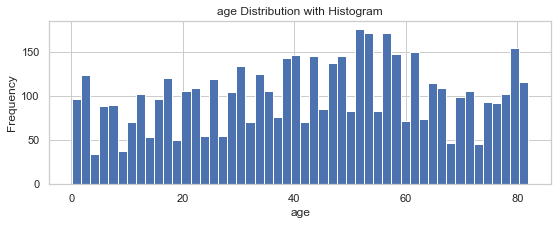

age:
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64


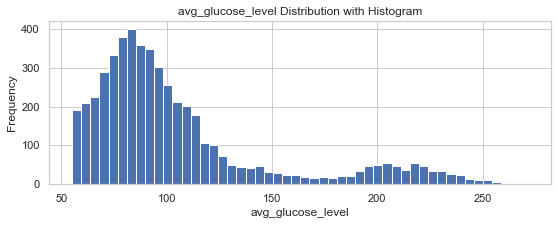

avg_glucose_level:
93.88     6
83.16     5
91.85     5
91.68     5
73.00     5
         ..
162.14    1
111.77    1
90.91     1
103.50    1
88.02     1
Name: avg_glucose_level, Length: 3979, dtype: int64


/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


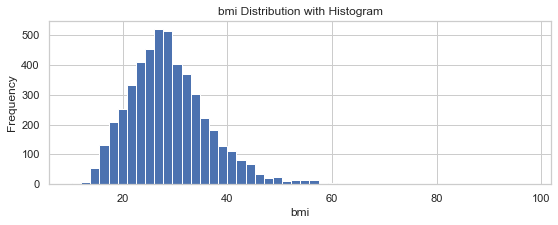

bmi:
28.7    41
28.4    38
26.7    37
27.7    37
26.1    37
        ..
13.9     1
49.9     1
40.6     1
52.3     1
44.1     1
Name: bmi, Length: 418, dtype: int64


In [14]:
numerical_variables = ['age', 'avg_glucose_level', 'bmi']
for n in numerical_variables:
    plot_hist(n)

Text(0.5, 1.0, 'avg_glucose_level Interval and Counts')

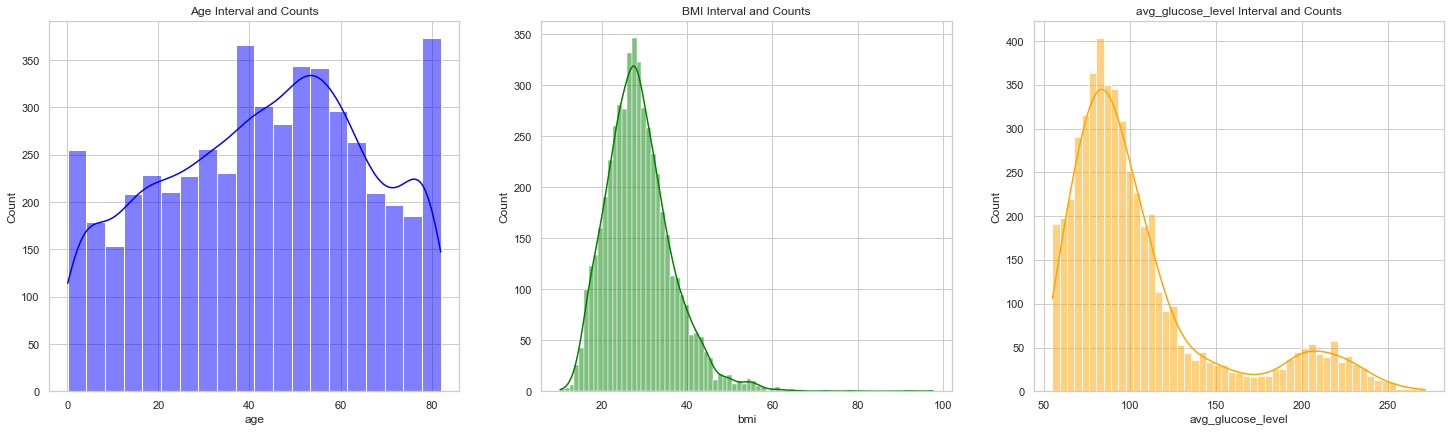

In [15]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['age'], color = 'blue', kde = True).set_title('Age Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['bmi'], color = 'green', kde = True).set_title('BMI Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['avg_glucose_level'], kde = True, color = 'orange').set_title('avg_glucose_level Interval and Counts')

## Deeper Dive of Data Analysis per Feature

In [16]:
#let's look at the data of those who did get a stroke
stroke_df = dataset.loc[dataset['stroke']==1]
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


### GENDER vs STROKE

In [17]:
gender_df = stroke_df[["gender","stroke"]].groupby(["gender"], as_index = False).count().sort_values(by=["stroke"],ascending = False)
gender_df

,gender,stroke
0,Female,141
1,Male,108


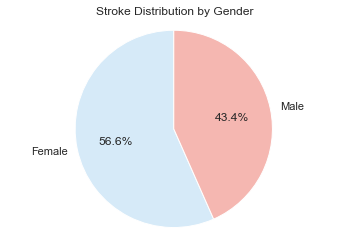

In [18]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = gender_df['gender']
sizes = gender_df['stroke']
colors = ['#D6EAF8', '#F5B7B1', '#566573']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Stroke Distribution by Gender')
plt.show()

### EVER MARRIED vs STROKE

In [19]:
married_df = stroke_df[["ever_married","stroke"]].groupby(["ever_married"], as_index = False).count().sort_values(by="stroke",ascending = False)
married_df

,ever_married,stroke
1,Yes,220
0,No,29


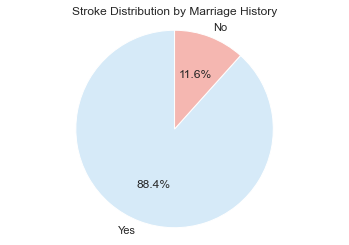

In [20]:
labels = married_df['ever_married']
sizes = married_df['stroke']
colors = ['#D6EAF8', '#F5B7B1']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Stroke Distribution by Marriage History')
plt.show()

### WORK TYPE vs STROKE

In [21]:
work_df = stroke_df[["work_type","stroke"]].groupby(["work_type"], as_index = False).count().sort_values(by="stroke",ascending = False)
work_df

,work_type,stroke
1,Private,149
2,Self-employed,65
0,Govt_job,33
3,children,2


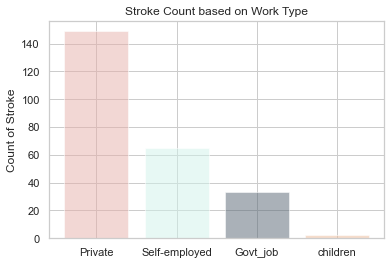

In [22]:
objects = work_df['work_type']
y_pos = np.arange(len(objects))
count = work_df['stroke']
colors = ['#E6B0AA', '#D1F2EB', '#566573','#EDBB99']

plt.bar(y_pos, count, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.title('Stroke Count based on Work Type') 
plt.ylabel('Count of Stroke')

plt.show()

### RESIDENCE TYPE vs STROKE

In [23]:
res_df = stroke_df[["Residence_type","stroke"]].groupby(["Residence_type"], as_index = False).count().sort_values(by="stroke",ascending = False)
res_df

,Residence_type,stroke
1,Urban,135
0,Rural,114


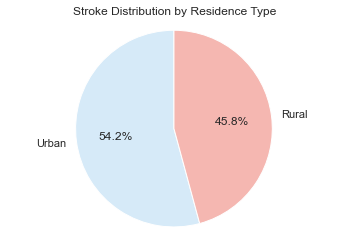

In [24]:
labels = res_df['Residence_type']
sizes = res_df['stroke']
colors = ['#D6EAF8', '#F5B7B1']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90, colors=colors)
ax1.axis('equal')

plt.title('Stroke Distribution by Residence Type')
plt.show()

### SMOKE STATUS vs STROKE

In [25]:
smoke_df = stroke_df[["smoking_status","stroke"]].groupby(["smoking_status"], as_index = False).count().sort_values(by="stroke",ascending = False)
smoke_df

,smoking_status,stroke
2,never smoked,90
1,formerly smoked,70
0,Unknown,47
3,smokes,42


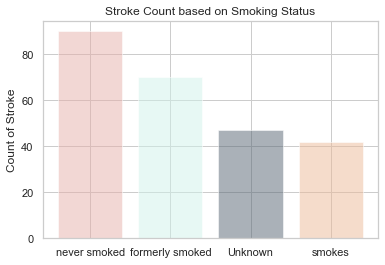

In [26]:
objects = smoke_df['smoking_status']
y_pos = np.arange(len(objects))
count = smoke_df['stroke']
colors = ['#E6B0AA', '#D1F2EB', '#566573','#EDBB99','#D6EAF8']

plt.bar(y_pos, count, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, objects)
plt.title('Stroke Count based on Smoking Status') 
plt.ylabel('Count of Stroke')

plt.show()

## Correlation

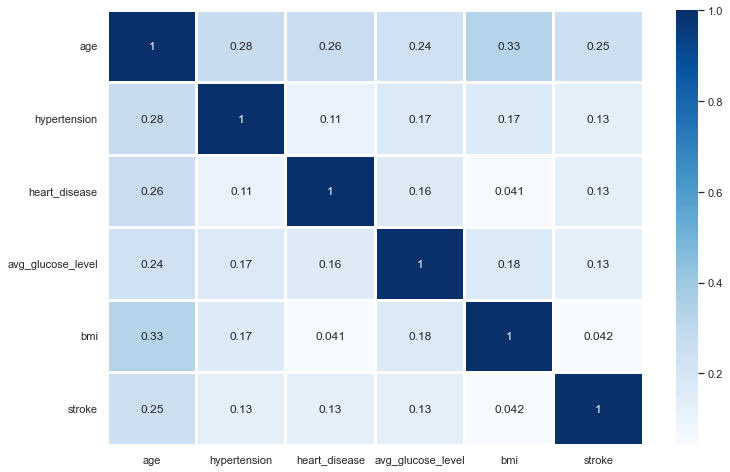

In [27]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Blues', linewidths = 2)
plt.show()

## Anomaly Detection

In [28]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [29]:
dataset.loc[detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke'])]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
14,Female,79.0,0,1,Yes,Private,Urban,214.09,28.2,never smoked,1
16,Male,64.0,0,1,Yes,Private,Urban,191.61,37.5,smokes,1
...,...,...,...,...,...,...,...,...,...,...,...
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
35,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
143,Female,69.0,1,1,No,Self-employed,Urban,72.17,36.8,never smoked,1
171,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1


In [30]:
# Drop the outliers from the dataset
dataset = dataset.drop(detect_outliers(dataset,['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']),axis = 0).reset_index(drop = True)
dataset

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
4,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5030,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5031,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5032,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5033,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [31]:
dataset['stroke'].value_counts()

0    4838
1     197
Name: stroke, dtype: int64

In [32]:
# Our label is not balanced... we have alot more 'no strokes' than 'strokes'

## Identify Missing Values

In [33]:
dataset[dataset['bmi'].isnull()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
5,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
17,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
18,Male,59.0,0,0,Yes,Private,Rural,211.78,NaN,formerly smoked,1
28,Female,63.0,0,0,Yes,Private,Urban,90.90,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4964,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
4973,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5018,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5024,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [34]:
# the number of bmi null values dropped after having removed the outliers
# bmi's usually vary between genders, so let's take a look

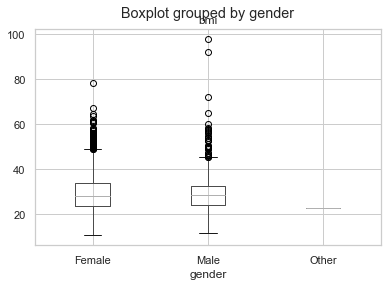

In [35]:
dataset.boxplot(column="bmi",by = "gender")
plt.show()

In [36]:
print("Mean of BMI value for Females: ", np.mean(dataset[dataset['gender'] == 'Female']['bmi']))
print("Mean of BMI value for Males: ", np.mean(dataset[dataset['gender'] == 'Male']['bmi']))
print("Mean of BMI value: ", np.mean(dataset['bmi']))

Mean of BMI value for Females:  29.035926055109872
Mean of BMI value for Males:  28.5946835443038
Mean of BMI value:  28.854614908114808


In [37]:
dataset['bmi'] = dataset['bmi'].fillna(0)

In [38]:
for i in range(0, 5034):
    if(dataset['bmi'][i] == 0):
        if(dataset['gender'][i] == 'Male'):
            dataset['bmi'][i] = 28.5946835443038
        elif(dataset['gender'][i] == 'Female'):
            dataset['bmi'][i] = 29.035275645498956
        else:
            dataset['bmi'][i] = 28.85419248244527

/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hiamdebsi/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [39]:
dataset.head(20) 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.035276,never smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
3,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
4,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
5,Female,59.0,0,0,Yes,Private,Rural,76.15,29.035276,Unknown,1
6,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,Unknown,1
7,Female,81.0,1,0,Yes,Private,Rural,80.43,29.700000,never smoked,1
8,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.800000,smokes,1
9,Female,54.0,0,0,Yes,Private,Urban,104.51,27.300000,smokes,1


In [40]:
# check if the loop worked
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5035 non-null   object 
 1   age                5035 non-null   float64
 2   hypertension       5035 non-null   int64  
 3   heart_disease      5035 non-null   int64  
 4   ever_married       5035 non-null   object 
 5   work_type          5035 non-null   object 
 6   Residence_type     5035 non-null   object 
 7   avg_glucose_level  5035 non-null   float64
 8   bmi                5035 non-null   float64
 9   smoking_status     5035 non-null   object 
 10  stroke             5035 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 432.8+ KB


In [41]:
# save the clean data to load onto mongodb
dataset.to_csv("../clean_data/StrokeDataClean.csv", index=False)